In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
path = "./IMDB/IMDB-Movie-Data.csv"

In [36]:
df = pd.read_csv(path)

In [37]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [38]:
# 电影评分的平均分
df["Rating"].mean()

6.723199999999999

In [39]:
# 电影导演的人数信息
# 方法1 series
df["Director"].unique().size

644

In [40]:
# 方法2 numpy
np.unique(df["Director"]).shape[0]

644

## 对于这一组电影数据，如果我们想看Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

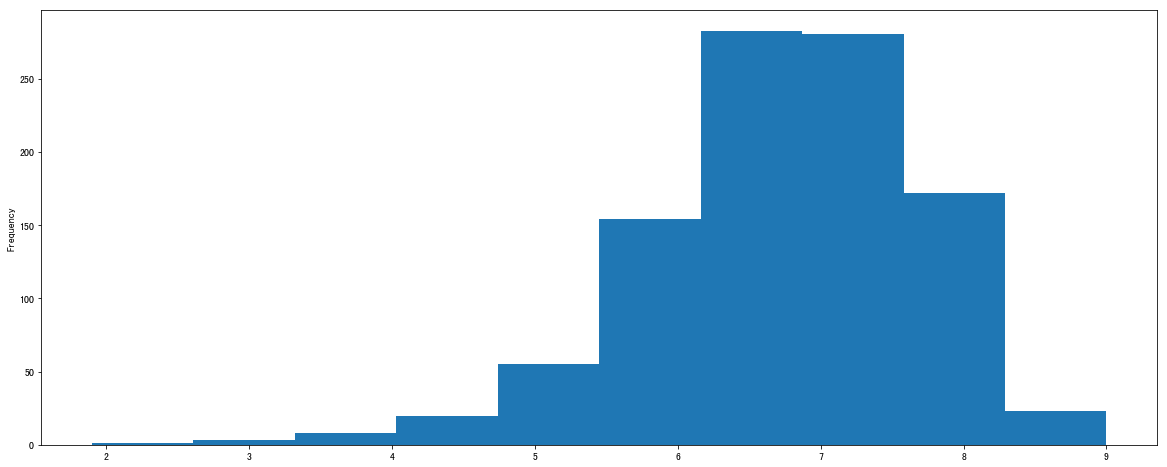

In [44]:
df["Rating"].plot(kind='hist', figsize=(20,8))

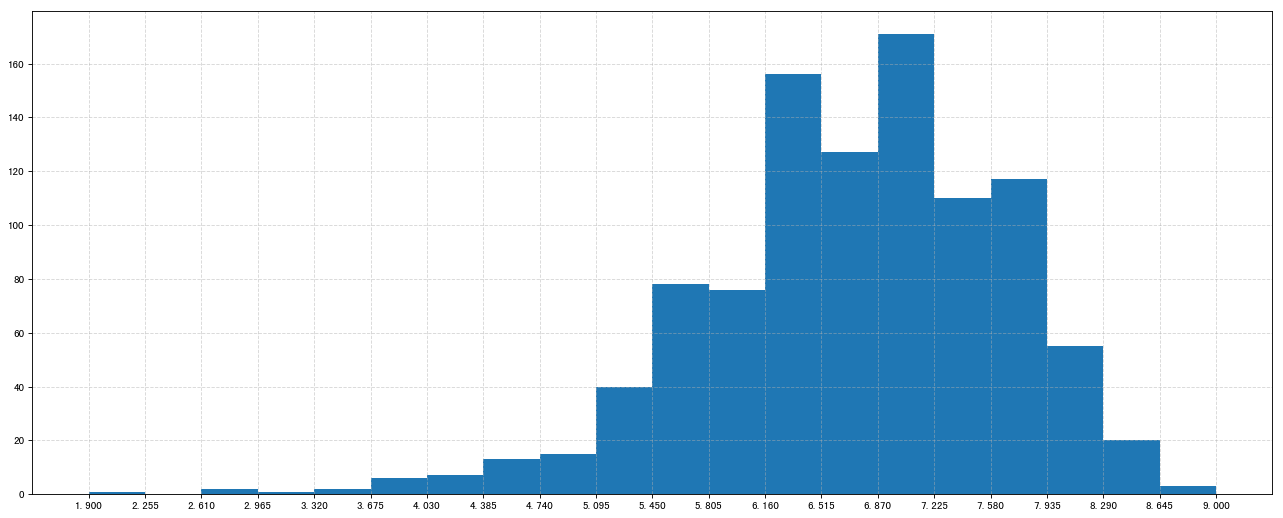

In [47]:
# 创建画布
plt.figure(figsize=(20,8), dpi=80)

# 绘制直方图
plt.hist(df["Rating"].values, bins=20)

# 修改刻度
max_ = df["Rating"].max()
min_ = df["Rating"].min()
plt.xticks(np.linspace(min_, max_, num=21))

# 添加网格
plt.grid(linestyle="--", alpha=0.5)

# 显示图像
plt.show()

## 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [49]:
# 进行字符串分割
class_list = [i.split(",") for i in df["Genre"]]

In [63]:
class_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [50]:
# 去重获得分类列表
genre_list = np.unique([j for i in class_list for j in i])

In [51]:
genre_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [55]:
len(genre_list)

20

In [56]:
# 创建空的DataFrame
data = pd.DataFrame(np.zeros((1000,20)), columns=genre_list)

In [64]:
# 遍历每一部电影，data中把分类出现的列的值置为1
# 第二句不太懂逻辑
for i in range(1000):
    data.ix[i, class_list[i]] = 1

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [58]:
data.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


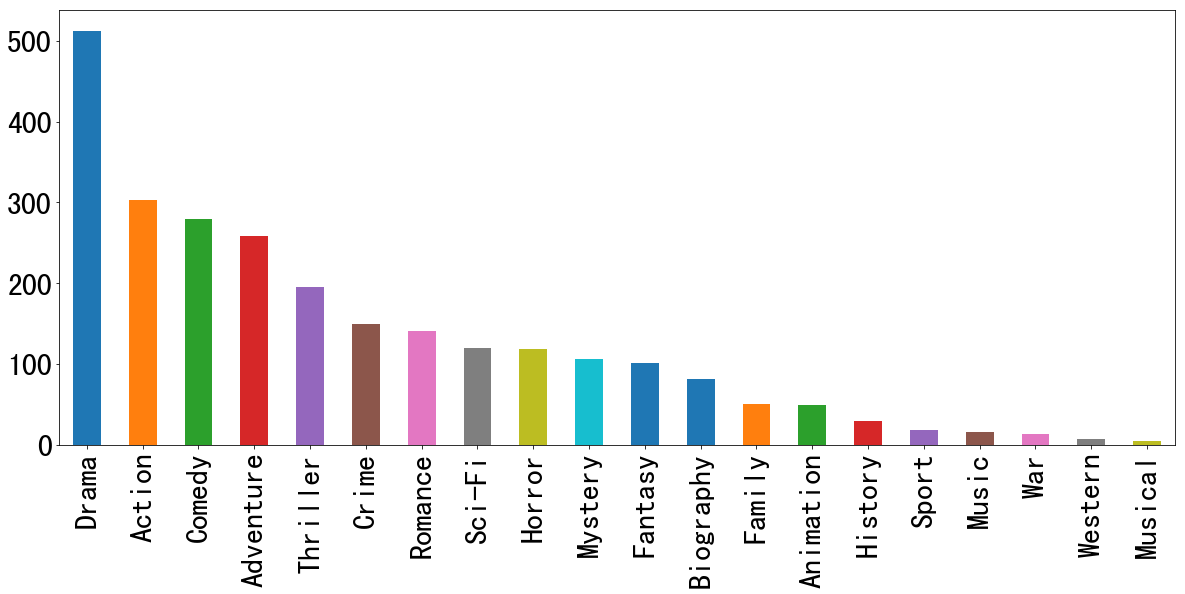

In [62]:
data.sum(0).sort_values(ascending=False).plot(kind="bar", figsize=(20,8), fontsize=30)